# ***`US accident Factors`***



> About This Project



The code you've provided seems to be a data preprocessing and exploration pipeline for analyzing US accident data. Here's a breakdown of what each section of the code does:

1. **Data Loading and Preprocessing:**
   - Loads the dataset and limits it to the first 400,000 rows.
   - Handles missing values by dropping rows with missing values in certain columns.
   - Drops unnecessary columns ('End_Lat' and 'End_Lng').

2. **Data Exploration and Analysis:**
   - Performs exploratory data analysis to understand the data.
   - Visualizes correlations among numeric columns using a heatmap.
   - Focuses on data related to California ('CA').
   - Removes rows with missing values in specific columns related to weather conditions.

3. **Data Visualization:**
   - Creates visualizations to showcase insights about the data.
   - Plots the top 10 cities by the number of accidents.
   - Visualizes the relationship between 'Start_Lat' and 'Severity'.

4. **Data Cleanup and Feature Engineering:**
   - Drops unnecessary columns ('ID', 'Description', 'Street', 'City', 'Zipcode', 'Country').
   - Defines functions to extract years and months from date columns.
   - Defines a function for one-hot encoding categorical columns.
   - Applies one-hot encoding to selected categorical columns ('Side', 'County', 'State', 'Timezone', 'Airport_Code').
   - Applies binary encoding to 'Source' and other columns related to twilight conditions.

5. **Data Splitting:**
   - Prepares the target variable 'Severity' (y) and the features (x) for training.
   - Adjusts the target variable values by subtracting 1 to make them start from 0.
   - Splits the data into training and testing sets.

The code provided seems to handle various data preprocessing steps, exploratory data analysis, visualization, and feature engineering. However, it is important to note that the code does not include the model training and evaluation part, which typically involves using machine learning algorithms to build a predictive model and evaluating its performance.

If you want to proceed with model training and evaluation, you will need to add the relevant code for selecting a machine learning algorithm, training the model, making predictions, and evaluating its performance using appropriate metrics.

In [ ]:
# Getting Started

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv', nrows=400000)

In [ ]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,A-400008,Source2,3,2017-04-25 12:15:27,2017-04-25 12:49:00,37.516037,-121.940689,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399996,A-400009,Source2,3,2017-04-25 12:13:06,2017-04-25 12:44:00,37.458626,-121.924133,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399997,A-400010,Source2,2,2017-04-25 12:14:47,2017-04-25 12:48:00,37.355961,-121.868294,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399998,A-400011,Source2,2,2017-04-25 12:32:34,2017-04-25 13:03:00,37.452118,-122.126907,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     400000 non-null  object 
 1   Source                 400000 non-null  object 
 2   Severity               400000 non-null  int64  
 3   Start_Time             400000 non-null  object 
 4   End_Time               400000 non-null  object 
 5   Start_Lat              400000 non-null  float64
 6   Start_Lng              400000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           400000 non-null  float64
 10  Description            400000 non-null  object 
 11  Street                 400000 non-null  object 
 12  City                   399981 non-null  object 
 13  County                 400000 non-null  object 
 14  State                  400000 non-nu

Missing Values

In [ ]:
data.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  400000
End_Lng                  400000
Distance(mi)                  0
Description                   0
Street                        0
City                         19
County                        0
State                         0
Zipcode                      43
Country                       0
Timezone                     43
Airport_Code                 44
Weather_Timestamp          3209
Temperature(F)             5915
Wind_Chill(F)            340905
Humidity(%)                6509
Pressure(in)               4647
Visibility(mi)             8779
Wind_Direction             3230
Wind_Speed(mph)           74171
Precipitation(in)        357955
Weather_Condition          8208
Amenity                       0
Bump                          0
Crossing

In [ ]:
data.isna().mean()

ID                       0.000000
Source                   0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  1.000000
End_Lng                  1.000000
Distance(mi)             0.000000
Description              0.000000
Street                   0.000000
City                     0.000048
County                   0.000000
State                    0.000000
Zipcode                  0.000107
Country                  0.000000
Timezone                 0.000107
Airport_Code             0.000110
Weather_Timestamp        0.008023
Temperature(F)           0.014788
Wind_Chill(F)            0.852263
Humidity(%)              0.016272
Pressure(in)             0.011617
Visibility(mi)           0.021948
Wind_Direction           0.008075
Wind_Speed(mph)          0.185427
Precipitation(in)        0.894887
Weather_Condition        0.020520
Amenity       

In [ ]:
null_columns = ['End_Lat','End_Lng']

data = data.drop(null_columns, axis=1)

In [ ]:
data.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                         19
County                        0
State                         0
Zipcode                      43
Country                       0
Timezone                     43
Airport_Code                 44
Weather_Timestamp          3209
Temperature(F)             5915
Wind_Chill(F)            340905
Humidity(%)                6509
Pressure(in)               4647
Visibility(mi)             8779
Wind_Direction             3230
Wind_Speed(mph)           74171
Precipitation(in)        357955
Weather_Condition          8208
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction

In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

In [ ]:
print("Total missing values: ",data.isna().sum().sum())

Total missing values:  0


In [ ]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-12,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.01,One lane blocked due to accident on I-70 Westb...,I-70 E,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-15,Source2,2,2016-02-08 08:39:43,2016-02-08 09:09:43,39.972038,-82.913521,0.01,Accident on OH-16 Broad St at James Rd. Expect...,E Broad St,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,0.00,Accident on Brookhill Dr at Glenhurst Ct.,Brookhill Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,A-398251,Source2,2,2017-04-13 19:12:02,2017-04-13 19:41:50,39.253979,-121.170898,0.00,Accident on Bitney Springs Rd at Starduster Dr.,Bitney Springs Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
13989,A-398265,Source2,3,2017-04-13 21:04:44,2017-04-13 21:34:27,39.320442,-120.560776,0.01,Right hand shoulder blocked due to accident on...,I-80 W,...,False,False,False,False,False,False,Night,Night,Night,Day
13990,A-398756,Source2,3,2017-04-17 09:18:08,2017-04-17 09:47:33,39.303341,-120.657280,0.01,#2 lane blocked due to jackknifed truck and ac...,I-80 W,...,False,False,False,False,False,False,Day,Day,Day,Day
13991,A-398862,Source2,2,2017-04-17 16:09:52,2017-04-17 16:39:18,39.187840,-120.833069,0.00,Accident on Canyon Creek Rd at High Sierra Dr.,High Sierra Dr,...,False,False,False,False,False,False,Day,Day,Day,Day


Unnecessary Columns

In [ ]:
df1=data[data['State']=='CA']

In [ ]:
df1

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,Airport_Code,Temperature(F),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_year,Weather_Timestamp_Month,Weather_Timestamp_Year
146,1,2,38.510437,-121.464523,0.01,Sacramento,CA,US/Pacific,KSAC,45.0,...,0,0,0,0,12,2016,12,2016,12,2016
147,1,2,38.676666,-121.638069,0.01,Yolo,CA,US/Pacific,KSAC,44.1,...,0,0,0,0,12,2016,12,2016,12,2016
148,1,2,38.538242,-121.473648,0.01,Sacramento,CA,US/Pacific,KSAC,44.1,...,0,0,0,0,12,2016,12,2016,12,2016
149,1,2,38.496086,-121.419502,0.01,Sacramento,CA,US/Pacific,KSAC,44.1,...,0,0,0,0,12,2016,12,2016,12,2016
150,1,2,37.752377,-121.773773,0.00,Alameda,CA,US/Pacific,KLVK,44.1,...,0,0,0,0,12,2016,12,2016,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,1,2,39.253979,-121.170898,0.00,Nevada,CA,US/Pacific,KGOO,41.0,...,0,0,0,0,04,2017,04,2017,04,2017
13989,1,3,39.320442,-120.560776,0.01,Nevada,CA,US/Pacific,KBLU,30.0,...,0,0,0,0,04,2017,04,2017,04,2017
13990,1,3,39.303341,-120.657280,0.01,Placer,CA,US/Pacific,KBLU,42.1,...,0,0,0,0,04,2017,04,2017,04,2017
13991,1,2,39.187840,-120.833069,0.00,Placer,CA,US/Pacific,KBLU,44.1,...,0,0,0,0,04,2017,04,2017,04,2017


In [ ]:
df1.duplicated().sum()

20

In [ ]:
d1f=df1.dropna(subset=['Precipitation(in)'])

In [ ]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [ ]:
df1.shape

(2799, 41)

In [ ]:
df1.isna().sum()/len(df1)*100

Source                     0.0
Severity                   0.0
Start_Lat                  0.0
Start_Lng                  0.0
Distance(mi)               0.0
County                     0.0
State                      0.0
Timezone                   0.0
Airport_Code               0.0
Temperature(F)             0.0
Wind_Chill(F)              0.0
Humidity(%)                0.0
Pressure(in)               0.0
Visibility(mi)             0.0
Wind_Direction             0.0
Wind_Speed(mph)            0.0
Precipitation(in)          0.0
Weather_Condition          0.0
Amenity                    0.0
Bump                       0.0
Crossing                   0.0
Give_Way                   0.0
Junction                   0.0
No_Exit                    0.0
Railway                    0.0
Roundabout                 0.0
Station                    0.0
Stop                       0.0
Traffic_Calming            0.0
Traffic_Signal             0.0
Turning_Loop               0.0
Sunrise_Sunset             0.0
Civil_Tw

In [ ]:
{column:len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'ID': 13993,
 'Source': 2,
 'Start_Time': 13947,
 'End_Time': 13927,
 'Description': 12402,
 'Street': 4789,
 'City': 1473,
 'County': 285,
 'State': 25,
 'Zipcode': 5445,
 'Country': 1,
 'Timezone': 3,
 'Airport_Code': 301,
 'Weather_Timestamp': 8554,
 'Wind_Direction': 23,
 'Weather_Condition': 53,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2}

In [ ]:
df1=df1.dropna(subset=['Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [ ]:
df1.isna().sum()/len(df1)*100

Source                     0.0
Severity                   0.0
Start_Lat                  0.0
Start_Lng                  0.0
Distance(mi)               0.0
County                     0.0
State                      0.0
Timezone                   0.0
Airport_Code               0.0
Temperature(F)             0.0
Wind_Chill(F)              0.0
Humidity(%)                0.0
Pressure(in)               0.0
Visibility(mi)             0.0
Wind_Direction             0.0
Wind_Speed(mph)            0.0
Precipitation(in)          0.0
Weather_Condition          0.0
Amenity                    0.0
Bump                       0.0
Crossing                   0.0
Give_Way                   0.0
Junction                   0.0
No_Exit                    0.0
Railway                    0.0
Roundabout                 0.0
Station                    0.0
Stop                       0.0
Traffic_Calming            0.0
Traffic_Signal             0.0
Turning_Loop               0.0
Sunrise_Sunset             0.0
Civil_Tw

In [ ]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,County,30
1,State,1
2,Timezone,1
3,Airport_Code,40
4,Wind_Direction,23
5,Weather_Condition,30
6,Start_Time_Month,12
7,Start_Time_Year,2
8,End_Time_Month,12
9,End_Time_year,2


In [ ]:
df1['Weather_Condition'].value_counts()

Fair                            1450
Partly Cloudy                    324
Cloudy                           260
Mostly Cloudy                    217
Light Rain                       211
Overcast                         113
Rain                              46
Haze                              35
Fog                               23
Clear                             20
Fair / Windy                      18
Smoke                             16
Light Snow                        10
Heavy Rain / Windy                 9
Snow                               8
Rain / Windy                       7
Light Rain / Windy                 5
Scattered Clouds                   5
Heavy Rain                         5
Showers in the Vicinity            3
Light Freezing Fog                 3
Mostly Cloudy / Windy              2
Partly Cloudy / Windy              2
Light Thunderstorms and Rain       1
Blowing Dust / Windy               1
Light Rain with Thunder            1
Light Drizzle                      1
T

In [ ]:
del df1['Airport_Code']

In [ ]:
df_num.columns

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Source,2
1,Severity,3
2,Start_Lat,1330
3,Start_Lng,1343
4,Distance(mi),6
5,Temperature(F),98
6,Wind_Chill(F),187
7,Humidity(%),96
8,Pressure(in),200
9,Visibility(mi),21


/tmp/ipykernel_32/738400029.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<Axes: >

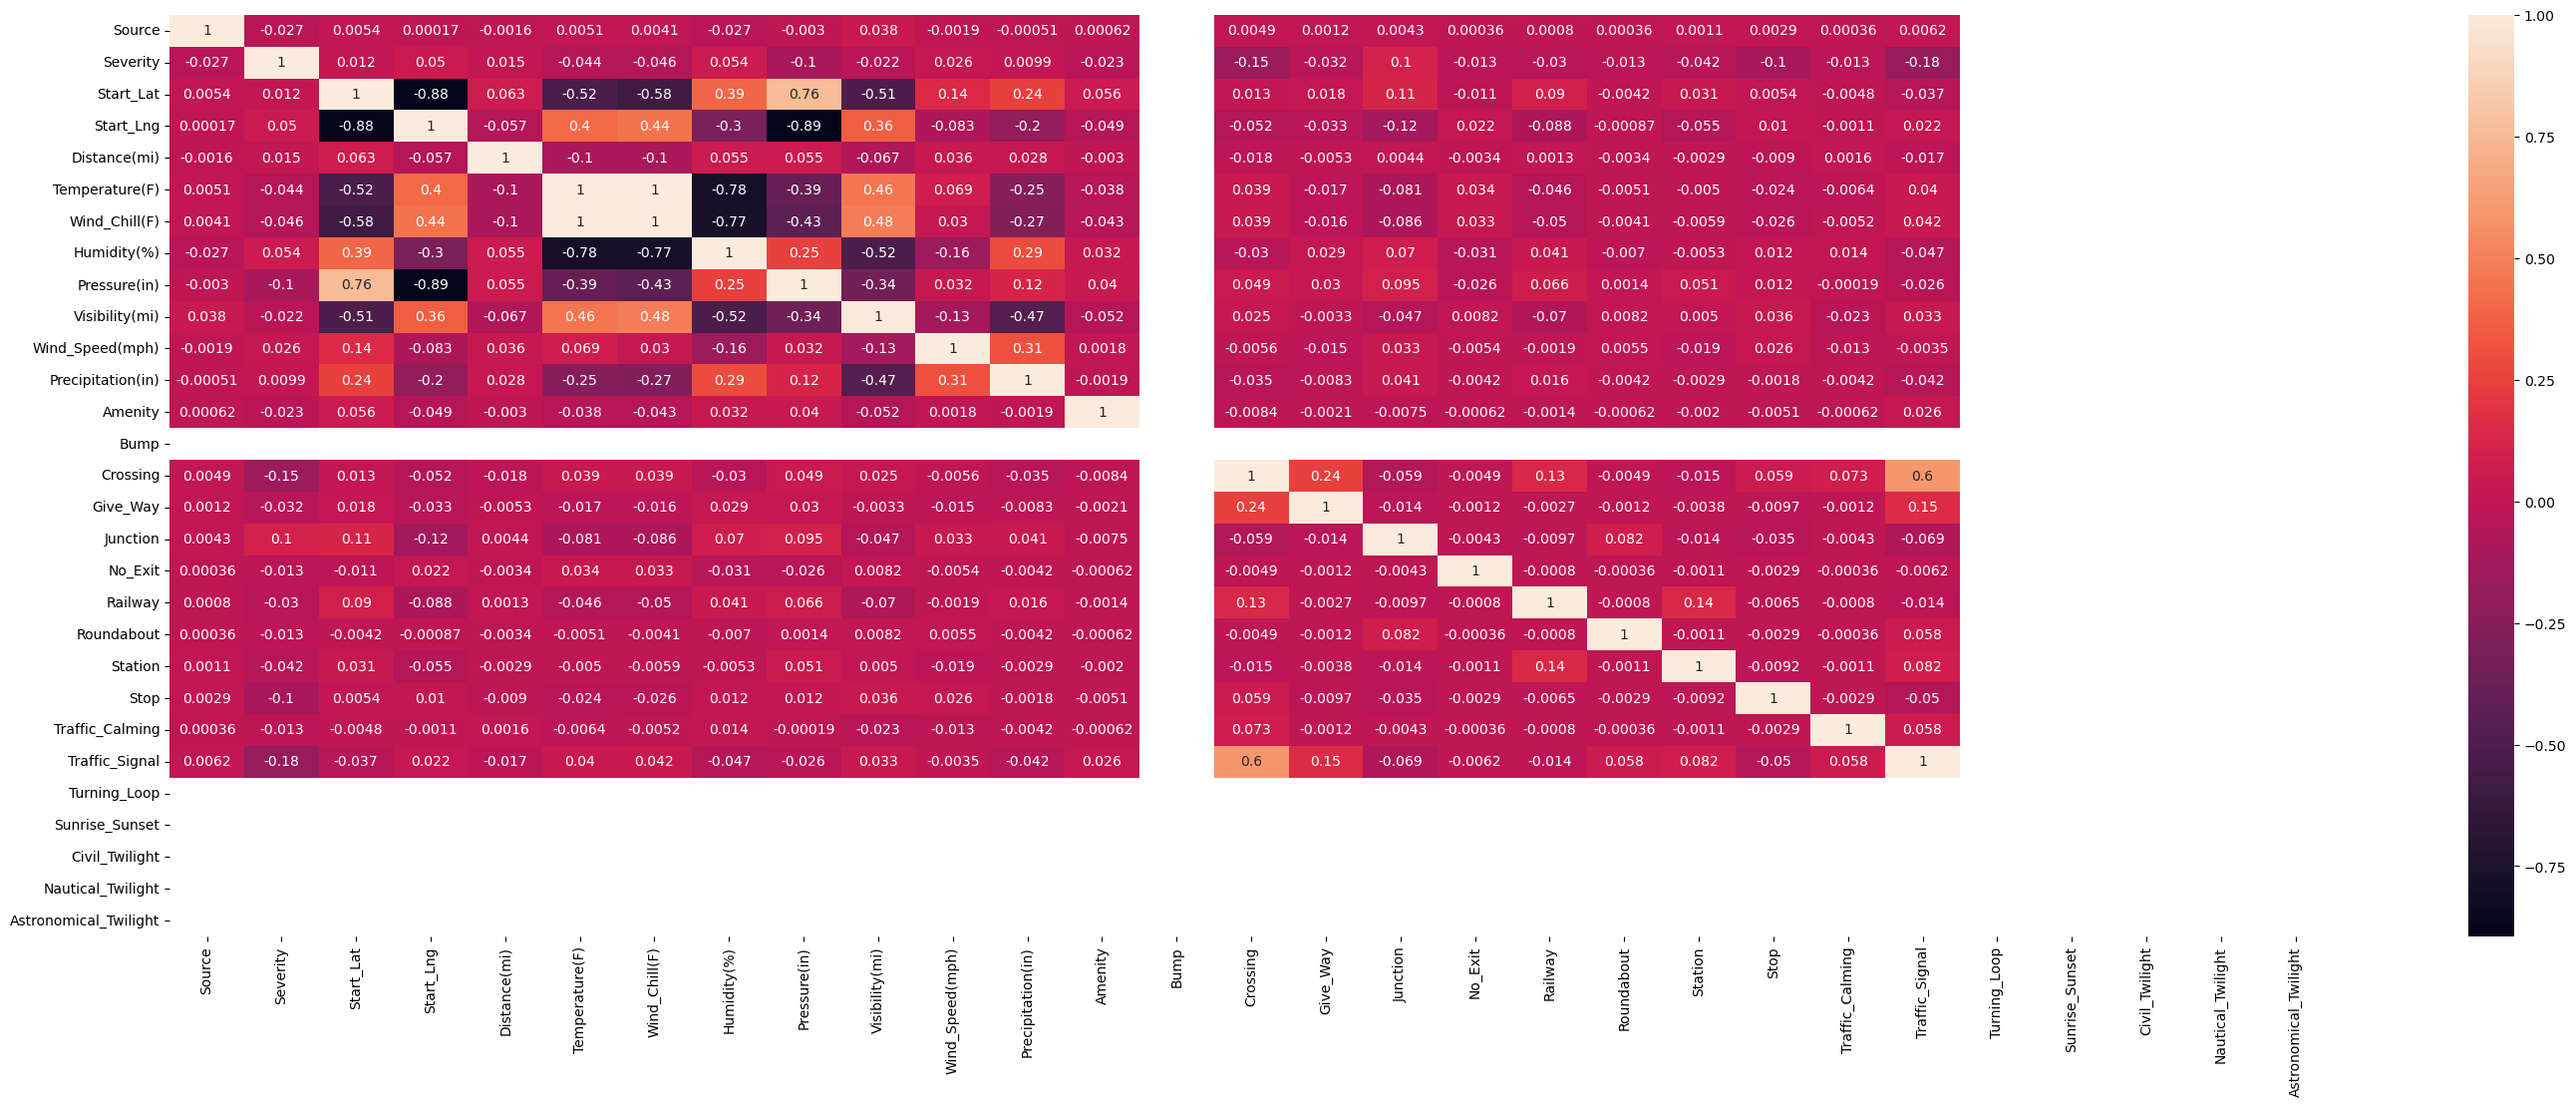

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(35, 12))
sns.heatmap(df1.corr(), annot=True)


In [ ]:
cities = df1['County'].unique()
len(cities)

30

In [ ]:
accidents_by_cities = df1['County'].value_counts()
accidents_by_cities

Los Angeles       1691
Riverside          561
Ventura            172
San Bernardino      66
Contra Costa        38
Placer              35
Nevada              35
Alameda             31
El Dorado           29
Sacramento          29
Sonoma              25
Santa Clara         13
Solano              13
San Joaquin         10
Calaveras            9
Lake                 6
Santa Cruz           6
San Mateo            4
Amador               4
Sierra               3
Yolo                 3
Napa                 3
Butte                3
Stanislaus           2
Mendocino            2
San Diego            2
Tuolumne             1
Monterey             1
Yuba                 1
San Francisco        1
Name: County, dtype: int64

In [ ]:
#top 10 cities by number of accident
accidents_by_cities[:10]

Los Angeles       1691
Riverside          561
Ventura            172
San Bernardino      66
Contra Costa        38
Placer              35
Nevada              35
Alameda             31
El Dorado           29
Sacramento          29
Name: County, dtype: int64

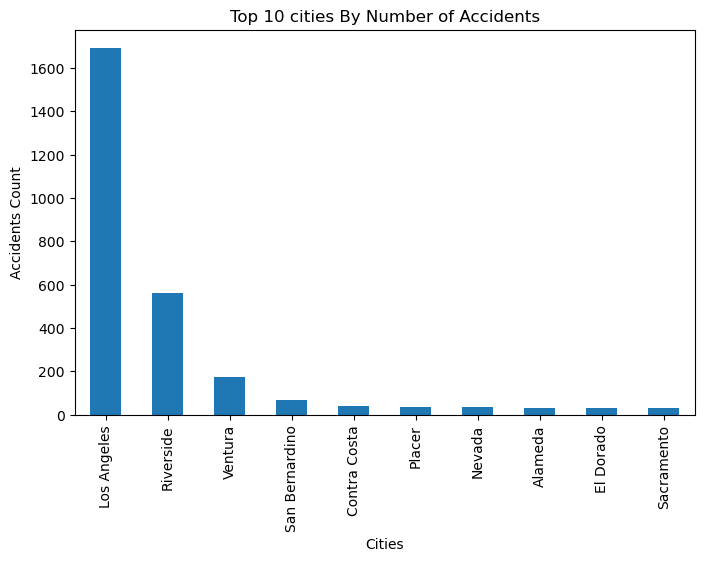

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [ ]:
accidents_severity = df1.groupby('Severity').count()
accidents_severity

,Source,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_year,Weather_Timestamp_Month,Weather_Timestamp_Year
Severity,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,...,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870
3,926,926,926,926,926,926,926,926,926,926,...,926,926,926,926,926,926,926,926,926,926


In [ ]:
df1['Start_Lat'].dtypes

dtype('float64')

In [ ]:
df1['E'].dtypes

dtype('float64')

<Axes: xlabel='Severity', ylabel='Start_Lat'>

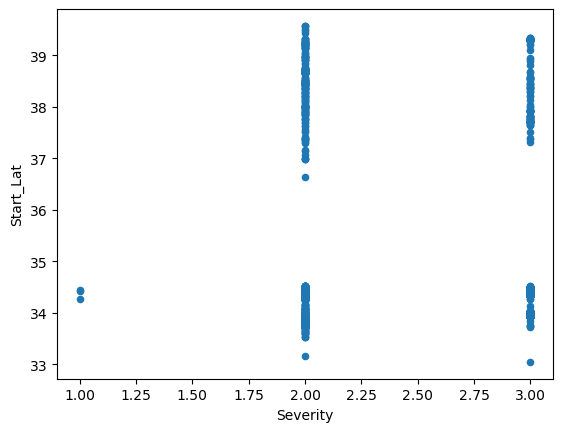

In [ ]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

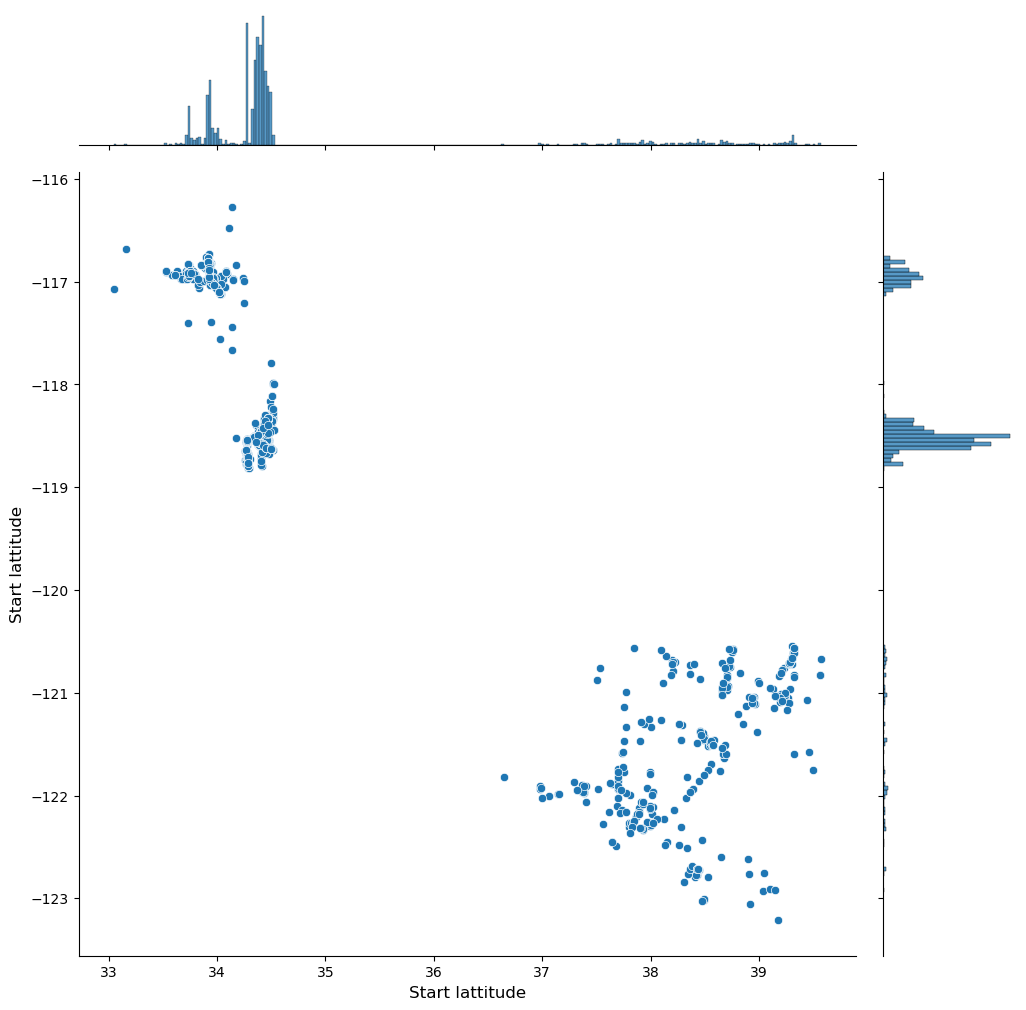

In [ ]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

In [ ]:
len(df_num.columns)

16

In [ ]:
Unneeded_columns = ['ID', 'Description','Street','City','Zipcode','Country']

data = data.drop(Unneeded_columns,axis=1)

In [ ]:
data

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
1,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
2,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.01,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
3,Source2,2,2016-02-08 08:39:43,2016-02-08 09:09:43,39.972038,-82.913521,0.01,Franklin,OH,US/Eastern,...,False,False,False,False,True,False,Day,Day,Day,Day
4,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,0.00,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,Source2,2,2017-04-13 19:12:02,2017-04-13 19:41:50,39.253979,-121.170898,0.00,Nevada,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day
13989,Source2,3,2017-04-13 21:04:44,2017-04-13 21:34:27,39.320442,-120.560776,0.01,Nevada,CA,US/Pacific,...,False,False,False,False,False,False,Night,Night,Night,Day
13990,Source2,3,2017-04-17 09:18:08,2017-04-17 09:47:33,39.303341,-120.657280,0.01,Placer,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day
13991,Source2,2,2017-04-17 16:09:52,2017-04-17 16:39:18,39.187840,-120.833069,0.00,Placer,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

In [ ]:
data

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,Airport_Code,Temperature(F),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_year,Weather_Timestamp_Month,Weather_Timestamp_Year
0,Source2,3,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,KCMH,37.9,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
1,Source2,3,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
2,Source2,3,39.932709,-82.830910,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
3,Source2,2,39.972038,-82.913521,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
4,Source2,2,40.052509,-82.882332,0.00,Franklin,OH,US/Eastern,KCMH,33.8,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,Source2,2,39.253979,-121.170898,0.00,Nevada,CA,US/Pacific,KGOO,41.0,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
13989,Source2,3,39.320442,-120.560776,0.01,Nevada,CA,US/Pacific,KBLU,30.0,...,Night,Night,Night,Day,04,2017,04,2017,04,2017
13990,Source2,3,39.303341,-120.657280,0.01,Placer,CA,US/Pacific,KBLU,42.1,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
13991,Source2,2,39.187840,-120.833069,0.00,Placer,CA,US/Pacific,KBLU,44.1,...,Day,Day,Day,Day,04,2017,04,2017,04,2017


In [ ]:
def onehot_encode(df,columns,prefixes):
    df = df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies = pd.get_dummies(df[columns],prefix=prefix)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(columns,axis=1)
    return df

In [ ]:
{column:len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Source': 2,
 'County': 285,
 'State': 25,
 'Timezone': 3,
 'Airport_Code': 301,
 'Wind_Direction': 23,
 'Weather_Condition': 53,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2,
 'Start_Time_Month': 12,
 'Start_Time_Year': 2,
 'End_Time_Month': 12,
 'End_Time_year': 2,
 'Weather_Timestamp_Month': 12,
 'Weather_Timestamp_Year': 2}

In [ ]:
data = onehot_encode(
        data,
    columns=['Side','County','State','Timezone','Airport_Code']
    prefixes=['SI','CO','ST','TZ','AC']
)

In [ ]:
data

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,Airport_Code,Temperature(F),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_year,Weather_Timestamp_Month,Weather_Timestamp_Year
0,Source2,3,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,KCMH,37.9,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
1,Source2,3,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
2,Source2,3,39.932709,-82.830910,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
3,Source2,2,39.972038,-82.913521,0.01,Franklin,OH,US/Eastern,KCMH,37.4,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
4,Source2,2,40.052509,-82.882332,0.00,Franklin,OH,US/Eastern,KCMH,33.8,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,Source2,2,39.253979,-121.170898,0.00,Nevada,CA,US/Pacific,KGOO,41.0,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
13989,Source2,3,39.320442,-120.560776,0.01,Nevada,CA,US/Pacific,KBLU,30.0,...,Night,Night,Night,Day,04,2017,04,2017,04,2017
13990,Source2,3,39.303341,-120.657280,0.01,Placer,CA,US/Pacific,KBLU,42.1,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
13991,Source2,2,39.187840,-120.833069,0.00,Placer,CA,US/Pacific,KBLU,44.1,...,Day,Day,Day,Day,04,2017,04,2017,04,2017


In [ ]:
data['Source'].unique()

array(['Source2', 'Source3'], dtype=object)

In [ ]:
def get_binary_column(df, column):
    if column == 'Source':
        return df[column].apply(lambda x: 1 if x == 'Source2' else 0)
    else :
        return df[column].apply(lambda x: 1 if x == 'Source2' else 0)

In [ ]:
data['Source'] = get_binary_column(data,'Source')


data['Sunrise_Sunset'] = get_binary_column(data,'Sunrise_Sunset')
data['Civil_Twilight'] = get_binary_column(data,'Civil_Twilight')
data['Nautical_Twilight'] = get_binary_column(data,'Nautical_Twilight')
data['Astronomical_Twilight'] = get_binary_column(data,'Astronomical_Twilight')

In [ ]:
y = data['Severity'].copy()
x = data.drop('Severity',axis=1).copy()

In [ ]:
y.unique()

array([3, 2, 1, 4])

In [ ]:
y=y-1

In [ ]:
x.shape

(13993, 40)